In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def model(r,N,q0) :
    p = [q0 for i in range(N)]
    for n in range(1,N):
        p[n] = r*(1-p[n-1])*p[n-1]
    return p 

## A different kind of visualization

Let's try another strategy of extracting visual information about the sequence $(q_n)$.

1. Calculate the first $N$ numbers, i.e. $q_0,q_1,\ldots,q_{N-1}$ for some large number $N$.
2. Ignore (don't plot) the first few numbers ($n<n_\mathrm{min}$) in the sequence, to allow it to "settle".
3. Plot the remaining points ($n=n_\mathrm{min},\ldots,N-1$), but all with the same $x$-coordinate.


Now, if after $n=n_\mathrm{min}$ the sequence has settled into periodic behaviour with period $P$, we should just see $P$ different points (the rest should overlap).

Let's first do this with $r=3.5$ (periodic beaviour with period 4), and some suitable values of $N$, $n_\mathrm{min}$ and $q_0$.

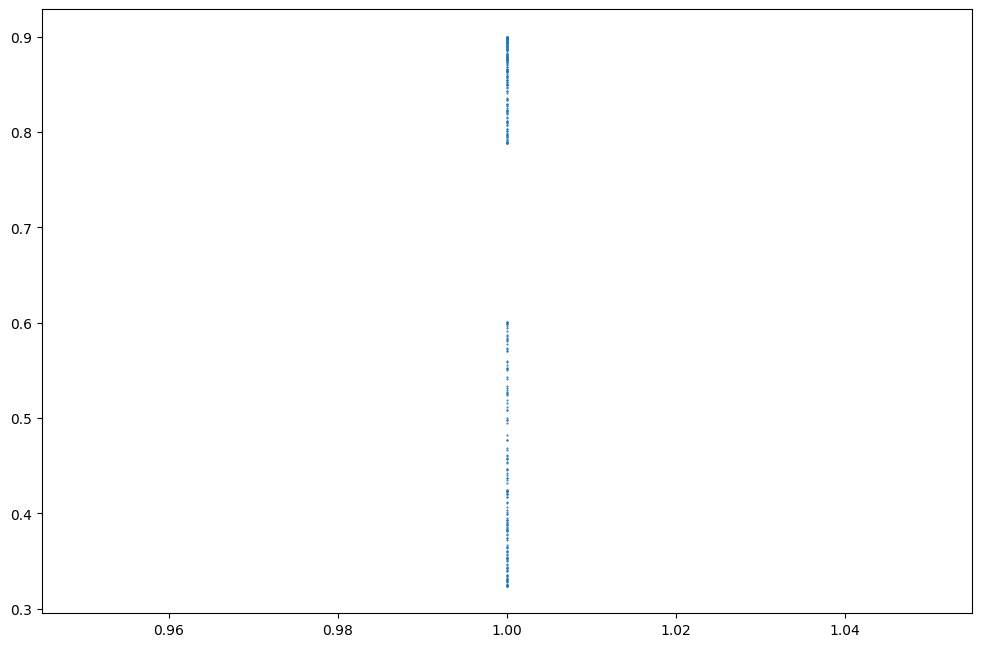

In [14]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.title()

N=500
nmin = 200
r = 3.6
q0 = 0.6

q=model(r,N,q0)                     # Calculate the first N values of the sequence
y=q[nmin:]                          # Extract the q_n-values starting from n=nmin. Note that this array has length N-nmin 
x=np.ones(N-nmin)                   # Create an array of the same length (N-nmin) with only ones. 
                                    # These are our x-coordinates (all equal to 1)
plt.plot(x,y,'.',markersize=1)      # Plot our x-coordinates (all one) against our y-coordinates 
                                    # (q_n values starting with n=nmin)
plt.show()

As predicted, we see only four different points, because for $n\geq n_{\mathrm{min}}$, the sequence has settled into periodic behaviour with period 4 (it just jumps between four values).

### To do!

In the cell above, change $r$ to $3.55$ and see what happens. Then try with $r=3.6$.

## Exercise

And here's your last exercise. Let's put a bunch of these plots together in the same picture, allowing us to see what happens as we change $r$ (letting the horizontal axis represent $r$).

In other words make plots like those above for many different $r$-values, and instead of $x=1$, use $x=r$.

I've written down a template for this below. Your job is to fill in the missing details.

*Hint*: You can easily modify the array `np.ones(N-nmin)` to get an array with some other number in it.

*Hint*: This is an **easy** exercise. You can use the code from the example above with just one small modification. Anything more than that and you are making it too difficult for yourself. But although you can mostly solve this exercise by copy-pasting, it's good for you to try to understand how the code works.


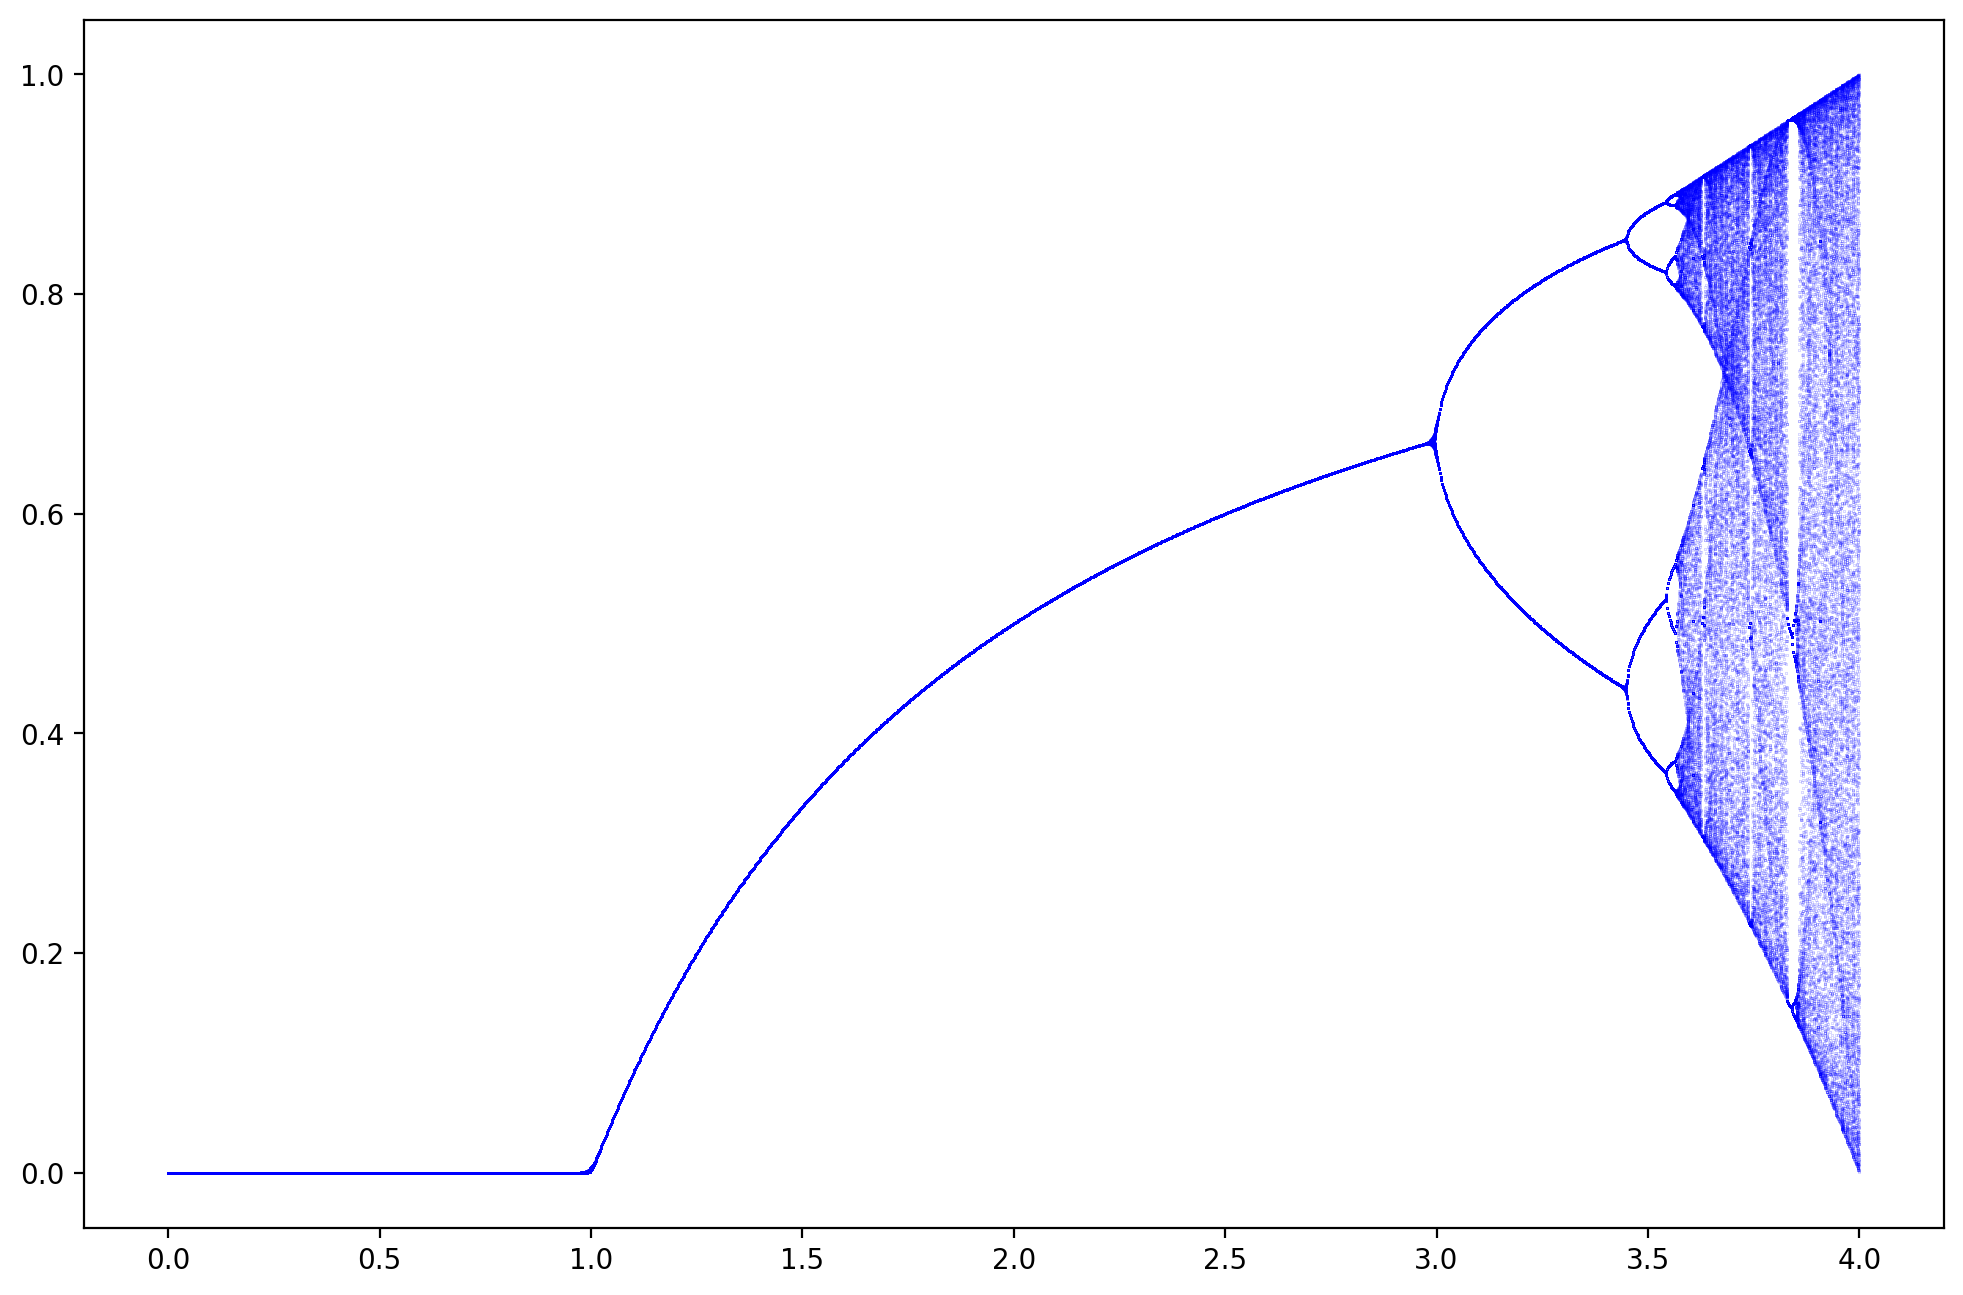

In [15]:
plt.figure(figsize=(12,8), dpi= 200, facecolor='w', edgecolor='k')

rmin = 0    # Smallest value of r for our plot
rmax = 4    # Largest value of r
N = 500     # How many $q_n$ to calculate in each sequence
nmin = 200  # Smallest value of n for $q_n$ to be plotted.
q0 = 0.6    # Initial value to use for each sequence

for r in np.linspace(rmin,rmax,2000) :      # For 2000 r-values from rmin to rmax
    x = r*np.ones(N-nmin)                   # Create an array of suitable length where all values are r
                                            # That is our x-coordinate
    q = model(r,N,q0)                       # Calculate the first N q_n values
    y = q[nmin:]                            # Our y-coordinates are the q_n values starting with n=nmin                                    
    plt.plot(x,y,'.',markersize=0.1,color='blue')  # Plot the points (don't change this line)
    
plt.show()

If your code is correct (you can use the code from the previous example with just one small modification), you should be able to see the following:

1. For $r\in [0,1)$ the sequence converges to the attracting fixed point $q^*=0$.
2. For $r\in (1,3)$, the sequence converges to the attracting fixed point $q^*=(r-1)/r$.
3. For $r$ from $3$ to $\approx 3.4$, the sequencence settles into alternating between two values.
4. At $r\approx 3.4$  (actually $r=1+\sqrt{6}\approx 3.449$) we switch to alternating between four values
5. As $r$ increases further, the period doubles again, and then it becomes hard to see what actually happens and when, but at some value of $r$ between $3.55$ and $3.6$ it turns chaotic.

## Exercise
Submit the following plots:
1. The one you just generated, showing the behaviour for $r\in [0,4]$.
2. Zoom in to display the region $r\in [3.445,3.575]$ (just change `rmin` and `rmax`). Submit this plot.
3. Another plot showing $r\in [3.445,4]$

What happens for $r\in [3.445,3.575]$ (Plot 2) is described in Wikipedia (you'll get the link later) with the following words
> - With r between 3.44949 and 3.54409 (approximately), from almost all initial conditions the population will approach permanent oscillations among four values.
> - With r increasing beyond 3.54409, from almost all initial conditions the population will approach oscillations among 8 values, then 16, 32, etc. The lengths of the parameter intervals that yield oscillations of a given length decrease rapidly; the ratio between the lengths of two successive bifurcation intervals approaches the Feigenbaum constant δ ≈ 4.66920. This behavior is an example of a period-doubling cascade.
> - At r ≈ 3.56995 is the onset of chaos, at the end of the period-doubling cascade. From almost all initial conditions, we no longer see oscillations of finite period. Slight variations in the initial population yield dramatically different results over time, a prime characteristic of chaos.

Looking at your third plot, you should also be able to see that *not all* $r>3.56995$ give chaotic behaviour. The next Wikipedia quote describes this phenomenon.

> Most values of r beyond 3.56995 exhibit chaotic behaviour, but there are still certain isolated ranges of r that show non-chaotic behavior; these are sometimes called islands of stability. For instance, beginning at 1 + √8 (approximately 3.82843) there is a range of parameters r that show oscillation among three values, and for slightly higher values of r oscillation among 6 values, then 12 etc.


## Last question
If you run the code again with `rmin=0`, `rmax=4` and change `nmin` from `200` to `0`, you get a somewhat different looking picture. Can you explain why it looks different? A few sentences will do.